# 使用 MultibodyPlant 的 PyPlot 动画教程
有关如何运行这些教程笔记本的说明，请参见 [index](./index.ipynb)。


## 选择 matplotlib 后端

Jupyter 笔记本提供了 `%matplotlib` 魔法命令，可以用来选择不同的后端：
https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

一般来说，你可以选择非交互式（如 `inline`）或交互式（如 `notebook`、`tk`）后端。本笔记本展示了一些可选项，你可以注释或取消注释来尝试。

**注意：我们建议在 Deepnote 和 Google Colab 上仅使用 `inline` 后端。**

首先，显示当前可能可用的后端选项。注意，有些后端可能缺少依赖，可能无法正常工作。

In [1]:
# 显示可用的 matplotlib 后端列表
%matplotlib --list 

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


现在在这里选择**一个**后端。这些选项更有可能在你的系统上被支持。

注意：在一次内核会话中只能选择一次后端。如果你想更换后端，需要重启内核。

In [2]:
# 这是非交互式的：以静态图片形式内嵌显示
%matplotlib inline

# 这是交互式的：在笔记本中显示动态图
# %matplotlib notebook

# 这是交互式的：在单独的 GUI 窗口中显示动态图
# %matplotlib tk

## 导入库

In [3]:
from IPython.display import HTML  # 用于在 Jupyter 中显示 HTML
from matplotlib import animation  # matplotlib 动画模块
import numpy as np  # 数值计算库

In [4]:
from pydrake.multibody.parsing import Parser  # 解析器
from pydrake.multibody.plant import AddMultibodyPlantSceneGraph  # 添加多体系统和场景图
from pydrake.systems.analysis import Simulator  # 仿真器
from pydrake.systems.framework import DiagramBuilder  # 系统图构建器
from pydrake.systems.planar_scenegraph_visualizer import (
    ConnectPlanarSceneGraphVisualizer)  # 平面场景图可视化器

## 定义摆系统示例

此函数整合自 `run_planar_scenegraph_visualizer.py`。

In [5]:
def run_pendulum_example(duration=1., playback=True, show=True):
    """
    运行一个摆系统的仿真。

    参数：
        duration: 仿真时长（秒）。
        playback: 是否生成 pyplot 动画。
        show: 是否显示可视化。
    """
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, 0.)
    parser = Parser(builder)
    parser.AddModels(
        url="package://drake/examples/pendulum/Pendulum.urdf")
    plant.Finalize()

    T_VW = np.array([[1., 0., 0., 0.],
                     [0., 0., 1., 0.],
                     [0., 0., 0., 1.]])
    visualizer = ConnectPlanarSceneGraphVisualizer(
        builder, scene_graph, T_VW=T_VW, xlim=[-1.2, 1.2],
        ylim=[-1.2, 1.2], show=show)
    if playback:
        visualizer.start_recording()

    diagram = builder.Build()
    simulator = Simulator(diagram)
    simulator.Initialize()
    simulator.set_target_realtime_rate(1.)

    # 将输入端口固定为零。
    plant_context = diagram.GetMutableSubsystemContext(
        plant, simulator.get_mutable_context())
    plant.get_actuation_input_port().FixValue(
        plant_context, np.zeros(plant.num_actuators()))
    plant_context.SetContinuousState([0.5, 0.1])
    simulator.AdvanceTo(duration)

    if playback:
        visualizer.stop_recording()
        ani = visualizer.get_recording_as_animation()
        return ani
    else:
        return None

## 不回放时运行

如果你使用的是非交互式后端，将不会看到任何动画。
此外，你会看到一个 UserWarning，提示正在使用非 GUI 后端。

如果你使用的是交互式后端，则会在仿真过程中看到动画。

如果你选择了 GUI 选项，每次运行下方代码都会弹出一个新窗口。

/home/lvxiangyu11/.local/lib/python3.10/site-packages/pydrake/systems/pyplot_visualizer.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


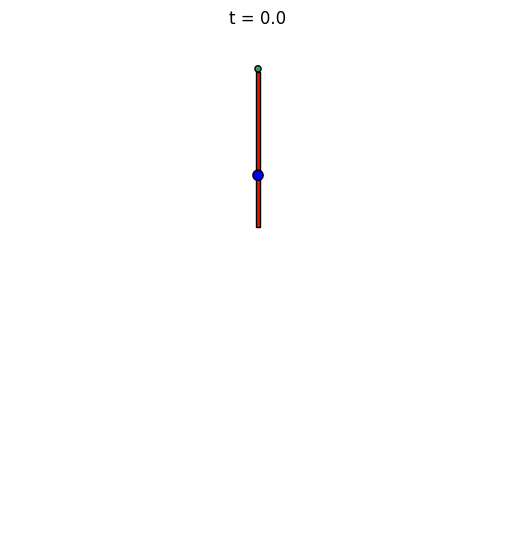

In [6]:
run_pendulum_example(playback=False)  # 不生成动画，仅仿真

## 回放动画运行

如果你使用的是非交互式后端，第一次输出不会看到动画。

如果你使用的是交互式后端，第一次输出会看到动画（仿真时实时显示）。此外，直接生成的动画图像会循环播放。

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


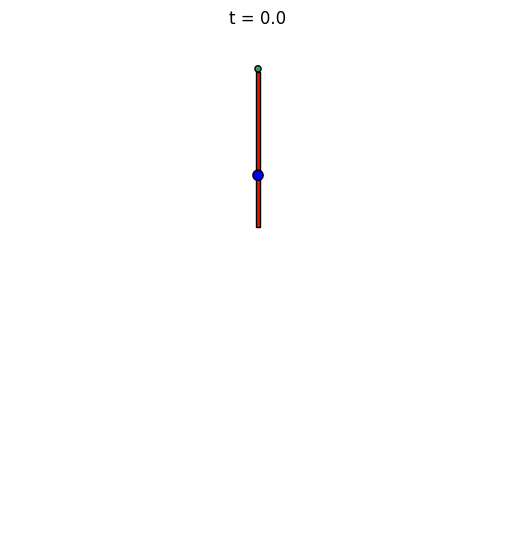

In [7]:
ani = run_pendulum_example(playback=True)  # 生成动画

既然你已经录制了动画，现在可以以如下两种方式展示动画（无论你选择的后端如何）：

* JavaScript HTML 小部件 - 支持更细致的控制
* HTML5 视频 - 需要 ffmpeg（Drake 的依赖中未默认安装）

In [8]:
HTML(ani.to_jshtml())  # 以 JS HTML 小部件方式展示动画

In [9]:
if animation.writers.is_available("ffmpeg"):
    display(HTML(ani.to_html5_video()))  # 以 HTML5 视频方式展示动画（需 ffmpeg）

如果你只想渲染动画而不显示图片，可以在 `PlanarSceneGraphVisualizer()` 构造函数中传入 `show=False`。

In [10]:
ani = run_pendulum_example(playback=True, show=False)
HTML(ani.to_jshtml())  # 只渲染动画，不显示图片

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
